From Plato to Nietzsche, these great philosophers share the deepest knowledge in our life time. Their books have been read by dozens of academic professionals and students. Do these books relate to each other? If I finish reading one book, which novel closely resemble this book? It is time to find out by applying Natural Language Processing on some of the greatest Philosophical books!

In [16]:
# Import library
import glob
import nltk
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
# ... YOUR CODE FOR TASK 1 ...
files.sort()
files

['datasets\\AristotleEthics.txt',
 'datasets\\AristotlePolitics.txt',
 'datasets\\DescartesDiscourseOfTheMethod.txt',
 'datasets\\DeweyMoralPrinciplesInEducation.txt',
 'datasets\\HumeATreatiseOfHumanNature.txt',
 'datasets\\HumeAnEnquiryConcerningthePrinciplesOfMorals.txt',
 'datasets\\KantTheCritiqueOfPureReason.txt',
 'datasets\\NietzscheBeyondGoodAndEvil.txt',
 'datasets\\NietzscheThusSpakeZarathustra.txt',
 'datasets\\NukariyaTheReligionOfTheSamurai.txt',
 'datasets\\PlatoApology.txt',
 'datasets\\PlatoTheRepublic.txt',
 'datasets\\RussellTheAnalysisOfMind.txt',
 'datasets\\TheCommunistManifesto.txt']

 Here are the authors follow by the book titles. 
 AristotleEthics 	AristotlePolitics 	DescartesDiscourseOfTheMethod 	DeweyMoralPrinciplesInEducation 	HumeATreatiseOfHumanNature 	HumeAnEnquiryConcerningthePrinciplesOfMorals 	KantTheCritiqueOfPureReason 	NietzscheBeyondGoodAndEvil 	NietzscheThusSpakeZarathustra 	NukariyaTheReligionOfTheSamurai 	PlatoApology 	PlatoTheRepublic 	RussellTheAnalysisOfMind 	MarxTheCommunistManifesto

In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []


for n in files:
    # Open each file
    f = open(n, encoding = 'utf-8-sig')
    # Remove all non-alpha-numeric characters
    # ... YOUR CODE FOR TASK 2 ...

    data = re.sub('[\W_]+',' ', f.read())
    # Store the texts and titles of the books in two separate lists
    # ... YOUR CODE FOR TASK 2 ...
    # ... YOUR CODE FOR TASK 2 ...
    titles.append(os.path.basename(n).replace('.txt', ''))
    txts.append(data)
    
[len(t) for t in txts]

[628749,
 576902,
 144620,
 82645,
 1305733,
 302310,
 1256351,
 387866,
 626879,
 491490,
 101899,
 1177834,
 523966,
 89406]

In [3]:
# Getting the English stop words from nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

# Printing out the first eight stop words
# ... YOUR CODE FOR TASK 6 ...
print(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alloq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when',

In [4]:
# Convert the text to lower case 
txts_lower_case = [word.lower() for word in txts]

# Transform the text into tokens 
txts_split = [word_lower.split() for word_lower in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in sw]for txt in txts_split]
texts[4][:20]

['project',
 'gutenberg',
 'ebook',
 'treatise',
 'human',
 'nature',
 'david',
 'hume',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'cost',
 'almost',
 'restrictions',
 'whatsoever',
 'may',
 'copy',
 'give',
 'away']

In [11]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
bows = [dictionary.doc2bow(text) for text in texts]

Tf-Idf stands for term frequency–inverse document frequency. This is to measure the weight of the word in a document. There is a formula of calculating the Tf-Idf score of the words. 

In [6]:
from gensim.models import TfidfModel
from gensim import similarities
import pandas as pd

#Find the Tfidf(term frequency-inverse document frequency) of the dictionary words. The model defines the importance of each word.
model = TfidfModel(bows)
# Compute the similarity matrix (pairwise distance between all texts).
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))
# Add the titles of the books as columns and index of the dataframe
# ... YOUR CODE FOR TASK 10 ...
sim_df.columns = titles
sim_df.index = titles
# Print the resulting matrix
# ... YOUR CODE FOR TASK 10 ...
sim_df

,AristotleEthics,AristotlePolitics,DescartesDiscourseOfTheMethod,DeweyMoralPrinciplesInEducation,HumeATreatiseOfHumanNature,HumeAnEnquiryConcerningthePrinciplesOfMorals,KantTheCritiqueOfPureReason,NietzscheBeyondGoodAndEvil,NietzscheThusSpakeZarathustra,NukariyaTheReligionOfTheSamurai,PlatoApology,PlatoTheRepublic,RussellTheAnalysisOfMind,TheCommunistManifesto
AristotleEthics,1.000000,0.093819,0.049108,0.034585,0.091326,0.106157,0.038399,0.075691,0.019492,0.013333,0.028250,0.123821,0.066201,0.008194
AristotlePolitics,0.093819,1.000000,0.051712,0.031996,0.083069,0.101819,0.022128,0.068062,0.015602,0.010303,0.056955,0.203751,0.036565,0.014783
DescartesDiscourseOfTheMethod,0.049108,0.051712,1.000000,0.027641,0.118960,0.088560,0.048453,0.069599,0.018731,0.010621,0.023443,0.081600,0.054147,0.007254
DeweyMoralPrinciplesInEducation,0.034585,0.031996,0.027641,1.000000,0.030031,0.040243,0.028288,0.061070,0.006466,0.014957,0.010011,0.053271,0.064488,0.017941
HumeATreatiseOfHumanNature,0.091326,0.083069,0.118960,0.030031,1.000000,0.312520,0.084163,0.089403,0.016127,0.019498,0.020380,0.114234,0.104911,0.007779
HumeAnEnquiryConcerningthePrinciplesOfMorals,0.106157,0.101819,0.088560,0.040243,0.312520,1.000000,0.061532,0.137236,0.026256,0.014280,0.032649,0.133556,0.063558,0.011340
KantTheCritiqueOfPureReason,0.038399,0.022128,0.048453,0.028288,0.084163,0.061532,1.000000,0.062491,0.004703,0.007907,0.008082,0.048613,0.089656,0.005161
NietzscheBeyondGoodAndEvil,0.075691,0.068062,0.069599,0.061070,0.089403,0.137236,0.062491,1.000000,0.164263,0.025774,0.039206,0.142410,0.077024,0.033217
NietzscheThusSpakeZarathustra,0.019492,0.015602,0.018731,0.006466,0.016127,0.026256,0.004703,0.164263,1.000001,0.012541,0.011425,0.047163,0.010462,0.003448
NukariyaTheReligionOfTheSamurai,0.013333,0.010303,0.010621,0.014957,0.019498,0.014280,0.007907,0.025774,0.012541,0.999997,0.004975,0.022183,0.014477,0.002881


No strong correlation between any of these books and most are below 0.1. Let's find the words with top and bottom Tf-Idf scores.

In [7]:
# Convert the tf-idf model into a DataFrame
for i, title in enumerate(titles):
    df_tfidf = pd.DataFrame(model[bows][i], columns = ['id', 'score'])

# Name the columns of the DataFrame id and score
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf
# Add the tokens corresponding to the numerical indices for better readability
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf['token'] = df_tfidf['id'].apply(lambda x: dictionary[x])
    df_tfidf['title'] = title
# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
# ... YOUR CODE FOR TASK 9 ...
    df_tfidf = df_tfidf.sort_values('score', ascending = False)
    
    print(df_tfidf)

        id     score         token            title
5464  5995  0.662876      sidenote  AristotleEthics
4324  4721  0.241229             p  AristotleEthics
2943  3196  0.188376         greek  AristotleEthics
1276  1368  0.187682  choiceworthy  AristotleEthics
3589  3894  0.179490             l  AristotleEthics
2790  3030  0.168507    friendship  AristotleEthics
3853  4193  0.105940       mastery  AristotleEthics
2463  2673  0.105130        excess  AristotleEthics
6221  6803  0.104382      unjustly  AristotleEthics
4428  4836  0.102362     perfected  AristotleEthics
4548  4970  0.093236   pleasurable  AristotleEthics
776    838  0.079710     aristotle  AristotleEthics
4550  4973  0.076215     pleasures  AristotleEthics
3566  3869  0.071878    kindnesses  AristotleEthics
2901  3148  0.068066          good  AristotleEthics
1818  1966  0.066992  deliberation  AristotleEthics
5227  5730  0.055905     rightness  AristotleEthics
4154  4532  0.055495       objects  AristotleEthics
1027  1100  

         id     score          token                       title
4374  11242  0.354272        betwixt  HumeATreatiseOfHumanNature
4690  11558  0.224880          coued  HumeATreatiseOfHumanNature
2347   5858  0.213074           sect  HumeATreatiseOfHumanNature
1781   4532  0.209208        objects  HumeATreatiseOfHumanNature
1356   3524  0.202508    impressions  HumeATreatiseOfHumanNature
6791  13659  0.196792       vivacity  HumeATreatiseOfHumanNature
538    1626  0.195905      connexion  HumeATreatiseOfHumanNature
5338  12206  0.190040       humility  HumeATreatiseOfHumanNature
1317   3427  0.185627           idea  HumeATreatiseOfHumanNature
1881   4796  0.152667        passion  HumeATreatiseOfHumanNature
1897   4832  0.118429    perceptions  HumeATreatiseOfHumanNature
2706   6660  0.115838     transition  HumeATreatiseOfHumanNature
4989  11857  0.108733       encrease  HumeATreatiseOfHumanNature
5972  12840  0.102040    phaenomenon  HumeATreatiseOfHumanNature
4646  11514  0.099531    

         id     score          token                       title
4839  16023  0.143842       nowadays  NietzscheBeyondGoodAndEvil
7082  18816  0.142447     skepticism  NietzscheBeyondGoodAndEvil
7565  19299  0.139217             ye  NietzscheBeyondGoodAndEvil
1179   3105  0.134674         german  NietzscheBeyondGoodAndEvil
602    1631  0.127646     conscience  NietzscheBeyondGoodAndEvil
2782   7118  0.122048          woman  NietzscheBeyondGoodAndEvil
3131   8238  0.119047         europe  NietzscheBeyondGoodAndEvil
7265  18999  0.117309          tempo  NietzscheBeyondGoodAndEvil
4789  15635  0.115351        germans  NietzscheBeyondGoodAndEvil
6002  17736  0.108930     gregarious  NietzscheBeyondGoodAndEvil
1666   4358  0.096149       morality  NietzscheBeyondGoodAndEvil
7509  19243  0.086498         wagner  NietzscheBeyondGoodAndEvil
7450  19184  0.086498     valuations  NietzscheBeyondGoodAndEvil
4770  15536  0.086088       european  NietzscheBeyondGoodAndEvil
1407   3674  0.081734    

         id     score         token             title
8620  26111  0.419959       glaucon  PlatoTheRepublic
3764   7179  0.249813           yes  PlatoTheRepublic
4848   9622  0.213476  thrasymachus  PlatoTheRepublic
4249   8414  0.202422     guardians  PlatoTheRepublic
4666   9277  0.184178       replied  PlatoTheRepublic
7847  25213  0.173596    adeimantus  PlatoTheRepublic
2516   4951  0.150084         plato  PlatoTheRepublic
9167  26658  0.117716   polemarchus  PlatoTheRepublic
3157   6077  0.102801      socrates  PlatoTheRepublic
4672   9284  0.092754      republic  PlatoTheRepublic
1691   3365  0.091931         homer  PlatoTheRepublic
1622   3229  0.090616     gymnastic  PlatoTheRepublic
4876   9679  0.088867        tyrant  PlatoTheRepublic
8159  25650  0.085901      cephalus  PlatoTheRepublic
2977   5773  0.072187        rulers  PlatoTheRepublic
8677  26168  0.069993        hellas  PlatoTheRepublic
6473  15396  0.068712     dialectic  PlatoTheRepublic
565    1391  0.068712      c

Text(0.5,1,'Similarity Value for NietzscheBeyondGoodAndEvil')

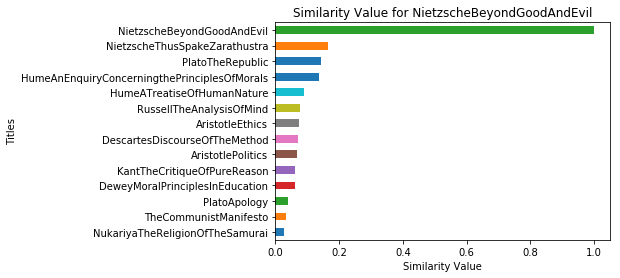

In [15]:
# This is needed to display plots in a notebook
%matplotlib inline

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df['NietzscheBeyondGoodAndEvil'] 

# Sort by ascending scores
v_sorted = v.sort_values(ascending = True)

# Plot this data has a horizontal bar plot
# ... YOUR CODE FOR TASK 11 ...
v_sorted.plot.barh(x = 'lab', y = 'val', rot = 0).plot
# Modify the axes labels and plot title for a better readability
# ... YOUR CODE FOR TASK 11 ...
plt.xlabel('Similarity Value')
plt.ylabel('Titles')
plt.title('Similarity Value for NietzscheBeyondGoodAndEvil')

I just randomly chose a novel and compare it with the rest. The highest similarity score is 0.2 which is low. 

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [33.75, 33.75, 70.0, 70.0],
  [10.0, 10.0, 51.875, 51.875],
  [85.0, 85.0, 95.0, 95.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [90.0, 90.0, 113.75, 113.75],
  [30.9375, 30.9375, 101.875, 101.875]],
 'dcoord': [[0.0, 1.2019789731980852, 1.2019789731980852, 0.0],
  [0.0, 1.288909265326777, 1.288909265326777, 0.0],
  [0.0, 1.3613533477954138, 1.3613533477954138, 1.288909265326777],
  [0.0, 1.3788715380539633, 1.3788715380539633, 1.3613533477954138],
  [0.0, 1.4102912093648574, 1.4102912093648574, 0.0],
  [1.3788715380539633,
   1.465611137241867,
   1.465611137241867,
   1.4102912093648574],
  [1.2019789731980852,
   1.507511940966781,
   1.507511940966781,
   1.465611137241867],
  [0.0, 0.9757227839244133, 0.9757227839244133, 0.0],
  [0.0, 1.1339651323184947, 1.1339651323184947, 0.0

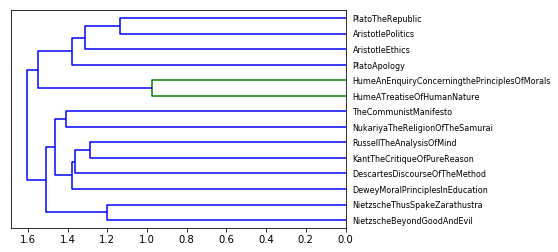

In [13]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
# ... YOUR CODE FOR TASK 12 ...
hierarchy.dendrogram(Z, leaf_font_size=8, labels=sim_df.index, orientation="left")

Here it is! The dendrogram, which breaks down the novel similarities. You can perform a similar relationship with 100 novels or even 1000 novels! On a last note, the wordcloud that generate the most popular words in the entire novel set. The bigger the word, the more count it has.

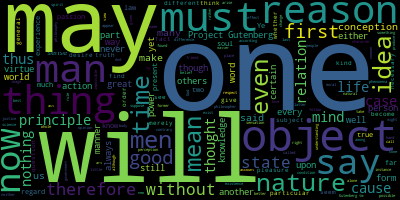

In [14]:
import wordcloud
# Create a WordCloud object
wordcloud = wordcloud.WordCloud()
long_string = ' '.join(txts)

wordcloud.generate(long_string)
wordcloud.to_image()